# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"


In [86]:
city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
sleep_interval = 55
basket_counter = 1
city_counter = 0
city_not_found = []
#loop thru all cities
#check if city can be found in openweathermap
#if found, add city to bucket set
#if not found, skip and continue
import datetime
import time

print(datetime.datetime.now())
newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)

    for x in range(50): #range(len(cities)):
        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        print(query_url)
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                logfile.write(process_msg + newline)
                
                print(process_msg)
                print(len(city) % 50)
                if (len(city) % 50) == 0:
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(sleep_interval)

            except:
                logfile.write("Other error." + newline)
                pass

        except:
            logfile.write(not_found + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)
        
print(datetime.datetime.now())

2020-11-01 18:02:45.419259
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kerman&units=imperial
Processing Record 1 of Set 1 | kerman
1
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=prince rupert&units=imperial
Processing Record 2 of Set 1 | prince rupert
2
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=qaanaaq&units=imperial
Processing Record 3 of Set 1 | qaanaaq
3
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ushuaia&units=imperial
Processing Record 4 of Set 1 | ushuaia
4
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=punta arenas&units=imperial
Processing Record 5 of Set 1 | punta arenas
5
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mataura&units=imperial
Processing Record 6 of Set 1 | mataura
6
http://api.openweathermap.org/data/2.5/we

In [52]:
len(cities)
len(countries)
len(city)
city_not_found
cloudiness
country 
date
humidity
lat
lng
len(max_temp)
#len(wind_speed)

47

In [ ]:
### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [87]:
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          47
Cloudiness    47
Country       47
Date          47
Humidity      47
Lat           47
Lng           47
Max Temp      47
Wind Speed    47
dtype: int64

In [88]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=False)

In [54]:
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kerman,0,IR,1604263974,22,30.28,57.08,44.60,4.70
1,Prince Rupert,90,CA,1604263974,87,54.32,-130.32,55.40,20.80
2,Qaanaaq,0,GL,1604263974,74,77.48,-69.36,1.29,7.58
3,Ushuaia,75,AR,1604263908,58,-54.80,-68.30,57.20,2.24
4,Punta Arenas,75,CL,1604264237,76,-53.15,-70.92,51.80,14.99
5,Mataura,67,NZ,1604263974,88,-46.19,168.86,48.99,7.00
6,Port Alfred,43,ZA,1604263975,83,-33.59,26.89,65.73,20.69
7,Castro,18,BR,1604263685,74,-24.79,-50.01,60.44,9.06
8,Rikitea,84,PF,1604263925,86,-23.12,-134.97,74.41,22.73
9,Thompson,90,CA,1604263945,85,55.74,-97.86,23.00,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [61]:
#create a data frame from city, lat, and max temp
from datetime import datetime
weather_dict = {"City" : city,
               "lat" : lat,
               "temp" : max_temp}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,lat,temp
0,Kerman,30.28,44.60
1,Prince Rupert,54.32,55.40
2,Qaanaaq,77.48,1.29
3,Ushuaia,-54.80,57.20
4,Punta Arenas,-53.15,51.80
5,Mataura,-46.19,48.99
6,Port Alfred,-33.59,65.73
7,Castro,-24.79,60.44
8,Rikitea,-23.12,74.41
9,Thompson,55.74,23.00


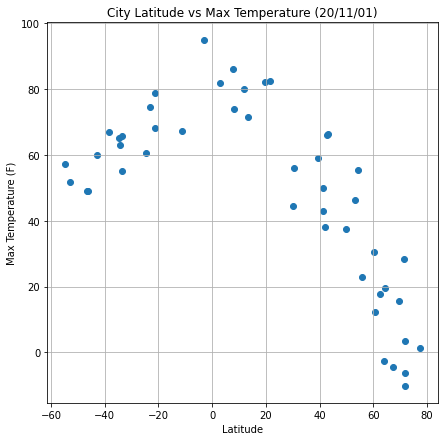

In [98]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_values = weather_data['lat']
y_values = weather_data['temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_values, y_values)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

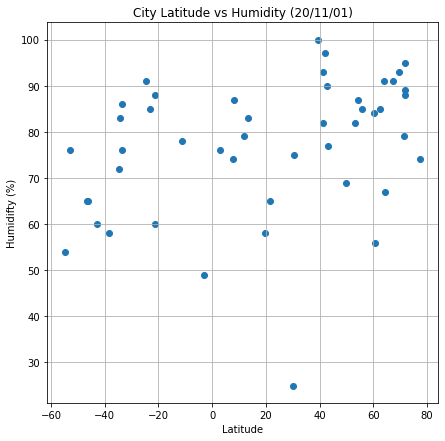

In [113]:
y_hum = city_df["Humidity"]
x_lat = city_df["Lat"]
fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidifty (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

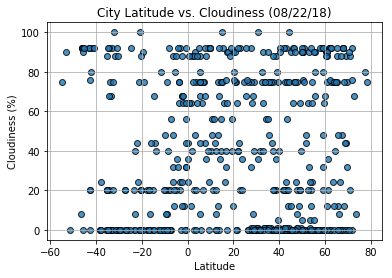

#### Latitude vs. Wind Speed Plot

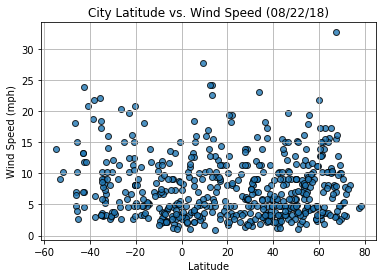